In [ ]:
import camelot
import pandas as pd
import json
from functools import reduce
import matplotlib.pyplot as plt

In [ ]:
def get_data(tables):
    data_frames = []
    for i in range(len(tables)):
        data_frames.append(tables[i].df)
    return data_frames        

In [3]:
data_frames = get_data(camelot.read_pdf('edital.pdf', pages='1-54', flavor='lattice', strip_text='\n'))

In [4]:
df = reduce(lambda left,right: pd.merge(left,right,on=[0,1,2,3,4],how='outer'), data_frames)
df.drop(0, inplace=True)
df.rename(columns={
    0:'Estudante', 1:'Unidade', 2:'Título do Trabalho', 
    3:'Programa', 4:'Data da apresentação'},inplace=True)

In [5]:
with open('docs/total.json','w', encoding='utf-8') as file: file.write(json.dumps(df.to_dict(), ensure_ascii=False, indent=4))        
df.to_excel('docs/total.xlsx', sheet_name='Sheet1', index=False)

In [ ]:
df

In [7]:
df.groupby(['Unidade']).groups.keys()

dict_keys(['CPAN', 'CPAQ', 'CPAR', 'CPCS', 'CPCX', 'CPNA', 'CPNV', 'CPPP', 'CPTL', 'ESAN', 'FAALC', 'FAAÇC', 'FACFAN', 'FACH', 'FACOM', 'FADIR', 'FAED', 'FAENG', 'FAMED', 'FAMEZ', 'FAODO', 'INBIO', 'INFI', 'INISA', 'INMA', 'INQUI', 'NHU', 'PROECE'])

In [8]:
len(df.groupby(['Unidade']).groups['CPPP'])

23

In [ ]:
df.groupby(['Unidade']).count().reset_index().sort_values(by='Estudante',ascending=False)

# **Quantidade de apresentações por campus**

In [10]:
ordenado = df.groupby(['Unidade']).count().reset_index().sort_values(by='Estudante',ascending=False)[['Unidade','Estudante']].reset_index().drop('index',axis=1)

In [11]:
qtd_unidade = ordenado.rename(columns={'Estudante':'Quantidade'}).set_index('Unidade')

In [12]:
# qtd_unidade.set_index('Unidade',inplace=True)

In [13]:
qtd_unidade

,Quantidade
Unidade,
CPTL,162
CPAN,95
FAENG,79
FACFAN,72
INISA,66
FAALC,64
FAMEZ,57
CPAQ,57
INBIO,56


In [14]:
# qtd_excel.reset_index() voltar para o q era antes

In [15]:
qtd_unidade.to_excel('docs/qtd_unidade.xlsx')

In [16]:
#https://matplotlib.org/2.0.0/examples/color/named_colors.html
colors = ['b','teal','#99ff99','#ffcc99', '#52BE80', '#F7DC6F', '#6C3483', 'crimson', 'darkturquoise', '#4A235A', '#F39C12', 'green', 'hotpink', '#800000', '#FFFF00', '#00FF00', '#FF00FF', '#0000FF', '#FF9999', 'red', '#800080', '#CD5C5C', '#E59866', '#1F618D', '#6E2C00', '#17202A', '#85C1E9', '#F1948A']

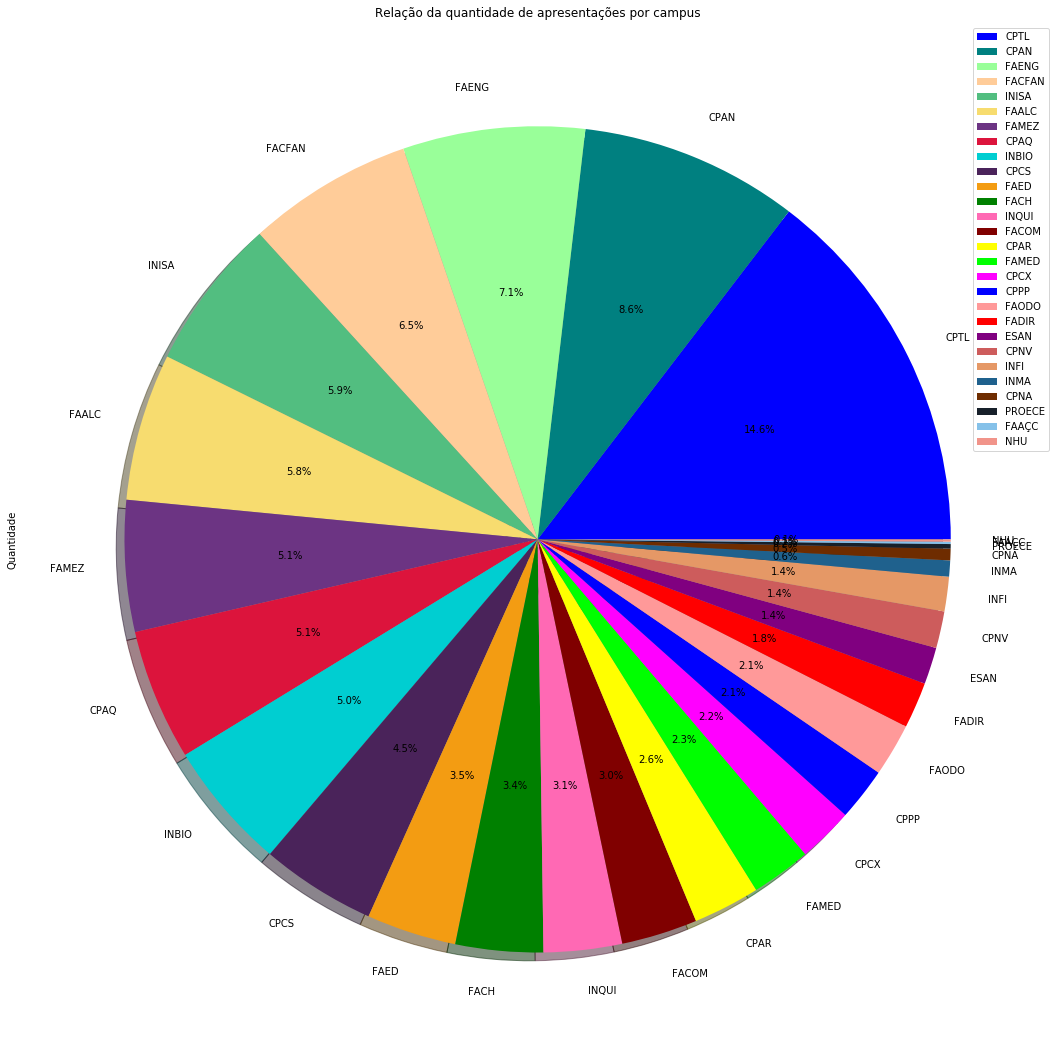

In [30]:
unidade_pie = qtd_unidade.plot.pie(y='Quantidade',figsize=(19, 19), shadow=True, autopct='%1.1f%%', colors=colors, title='Relação da quantidade de apresentações por campus')

In [18]:
unidade_pie_fig = unidade_pie.get_figure()

In [19]:
unidade_pie_fig.savefig('img/unidade_pie.pdf')

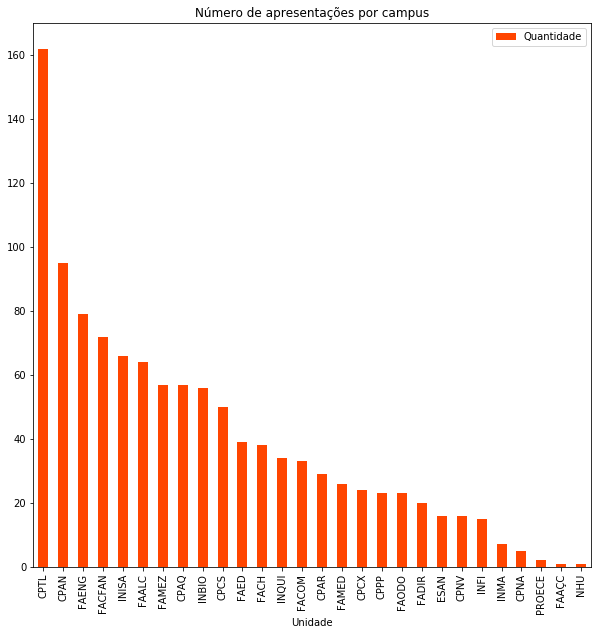

In [31]:
# ax = qtd_unidade.plot(color='teal',figsize=(10,10), label='Quantidade', legend=False)
# unidade_bar = qtd_unidade.plot(color='teal',figsize=(10,10), label='Quantidade', kind='bar', ax=ax)
unidade_bar = qtd_unidade.plot(color='orangered',figsize=(10,10), label='Quantidade', kind='bar', title='Número de apresentações por campus')

In [32]:
for p in unidade_bar.patches: unidade_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [33]:
unidade_bar_fig = unidade_bar.get_figure()

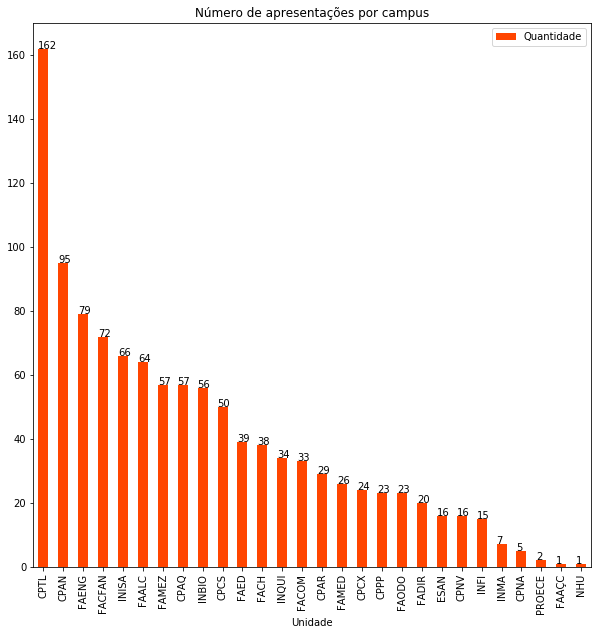

In [34]:
unidade_bar_fig

In [35]:
unidade_bar_fig.savefig('img/unidade_bar.pdf')

# **Quantidade por programa**

In [36]:
ordenado = df.groupby(['Programa']).count().reset_index().sort_values(by='Estudante',ascending=False)[['Programa','Estudante']].reset_index().drop('index',axis=1)

In [37]:
qtd_programa = ordenado.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [38]:
qtd_programa

,Quantidade
Programa,
PIBIC,463
PIVIC,200
ENEX,114
PPG,84
PAEXT,71
PET,55
PIBID,39
RP,23
PEG,17


In [39]:
qtd_programa.to_excel('docs/qtd_programa.xlsx')

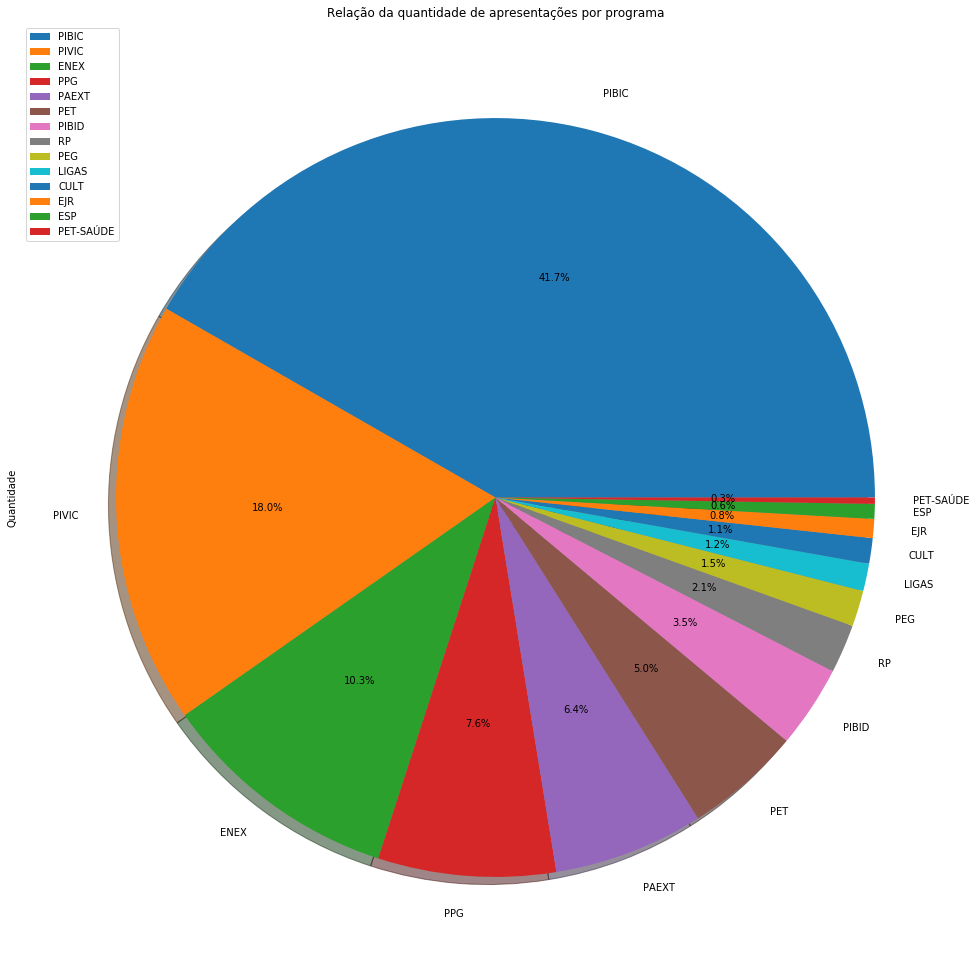

In [42]:
programa_pie = qtd_programa.plot.pie(y='Quantidade',figsize=(17, 20), shadow=True, autopct='%1.1f%%',title='Relação da quantidade de apresentações por programa')

In [43]:
programa_pie_fig = programa_pie.get_figure()

In [44]:
programa_pie_fig.savefig('img/programa_pie.pdf')

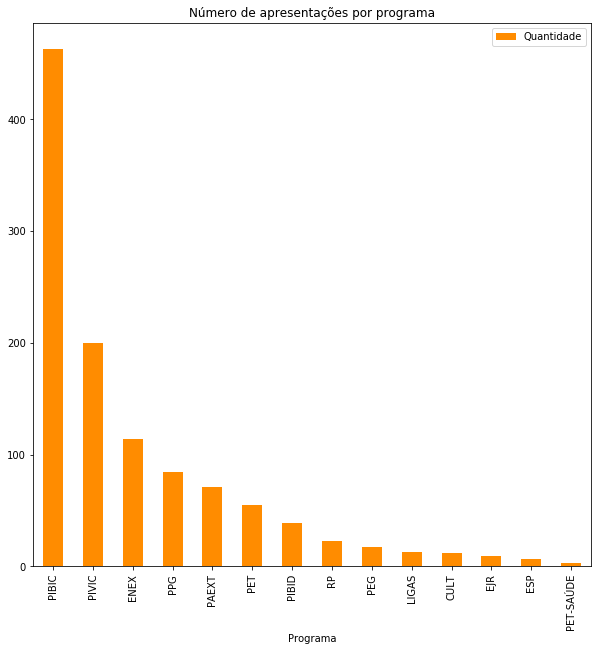

In [46]:
#ax = qtd_programa.plot(color='teal',figsize=(10,10), label='Quantidade', legend=False)
programa_bar = qtd_programa.plot(color='darkorange',figsize=(10,10), label='Quantidade', kind='bar',title='Número de apresentações por programa')

In [47]:
for p in programa_bar.patches: programa_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [48]:
programa_bar_fig = programa_bar.get_figure()

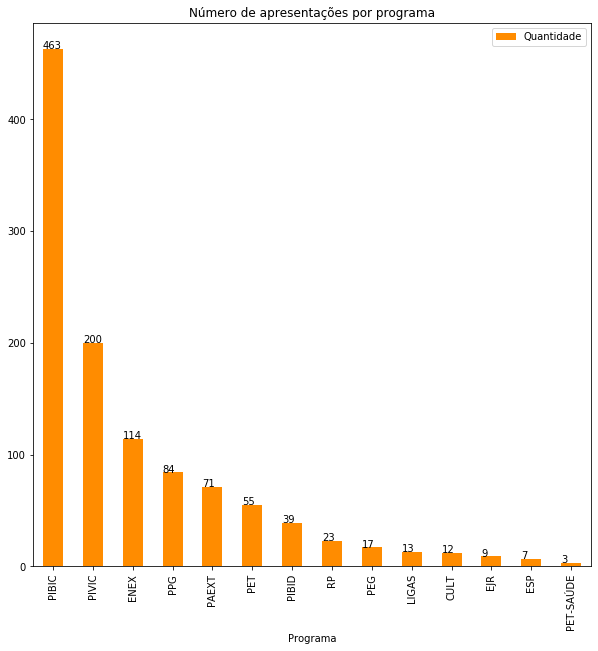

In [49]:
programa_bar_fig

In [50]:
programa_bar_fig.savefig('img/programa_bar.pdf')

# **Quantidade de apresentacoes que cada programa lançou em cada unidade**

In [56]:
ordenado_unidade = df.groupby(['Programa','Unidade']).count().reset_index().sort_values(by='Unidade',ascending=True)[['Programa','Unidade','Estudante']].reset_index().drop('index',axis=1)

In [57]:
qtd_proguni_unid = ordenado_unidade.rename(columns={'Estudante':'Quantidade'}).set_index('Unidade')

In [58]:
#qtd_proguni_unid.loc['CPPP']['Quantidade'].sum()

In [59]:
#qtd_proguni_unid.loc['CPPP'][['Programa','Quantidade']]

In [60]:
qtd_proguni_unid

,Programa,Quantidade
Unidade,,
CPAN,CULT,2
CPAN,PAEXT,4
CPAN,PEG,2
CPAN,PET,4
CPAN,ENEX,16
CPAN,PIBIC,22
CPAN,PIBID,7
CPAN,PIVIC,7
CPAN,ESP,3


In [61]:
qtd_proguni_unid.to_excel('docs/qtd_proguni_unid.xlsx')

In [62]:
ordenado_prog = df.groupby(['Programa','Unidade']).count().reset_index().sort_values(by='Programa',ascending=True)[['Programa','Unidade','Estudante']].reset_index().drop('index',axis=1)

In [63]:
qtd_proguni_prog = ordenado_prog.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [64]:
#qtd_proguni_prog.loc['CPPP']['Quantidade'].sum()

In [65]:
#qtd_proguni_prog.loc['CPPP'][['Programa','Quantidade']]

In [66]:
qtd_proguni_prog

,Unidade,Quantidade
Programa,,
CULT,CPAN,2
CULT,CPAQ,1
CULT,CPAR,2
CULT,CPNA,1
CULT,CPTL,1
CULT,FAALC,4
CULT,FAED,1
EJR,FAMEZ,1
EJR,FAENG,2


In [67]:
qtd_proguni_prog.to_excel('docs/qtd_proguni_prog.xlsx')

In [68]:
dfs = {'Ordenado por Unidade':qtd_proguni_unid, 'Ordenado por Programa':qtd_proguni_prog}

In [69]:
dfs

{'Ordenado por Unidade':         Programa  Quantidade
 Unidade                     
 CPAN        CULT           2
 CPAN       PAEXT           4
 CPAN         PEG           2
 CPAN         PET           4
 CPAN        ENEX          16
 CPAN       PIBIC          22
 CPAN       PIBID           7
 CPAN       PIVIC           7
 CPAN         ESP           3
 CPAN          RP           6
 CPAN         EJR           1
 CPAN         PPG          21
 CPAQ          RP           5
 CPAQ        CULT           1
 CPAQ       PAEXT           7
 CPAQ         PEG           1
 CPAQ       PIBIC          19
 CPAQ       PIVIC          15
 CPAQ       PIBID           8
 CPAQ        ENEX           1
 CPAR       PIVIC           2
 CPAR         PPG           1
 CPAR         PEG           3
 CPAR       LIGAS           1
 CPAR       PIBIC           8
 CPAR       PAEXT           2
 CPAR       PIBID           1
 CPAR          RP           1
 CPAR        CULT           2
 CPAR        ENEX           8
 ...          ..

In [70]:
writer = pd.ExcelWriter('docs/prog_unid.xlsx', engine='xlsxwriter')
for sheet_name in dfs.keys(): dfs[sheet_name].to_excel(writer, sheet_name=sheet_name, index=True)
writer.save()

# **Alunos que submeteram mais de um trabalho**

In [71]:
x = df.groupby(['Estudante','Unidade']).count().reset_index()[['Estudante','Unidade','Data da apresentação']].reset_index().sort_values(by='Unidade',ascending=True).drop('index',axis=1)

In [72]:
estudante = x.rename(columns={'Data da apresentação':'Quantidade'})

In [73]:
aluno_excel = estudante[estudante['Quantidade']>1].reset_index().drop('index',axis=1)

In [74]:
aluno_excel

,Estudante,Unidade,Quantidade
0,GABRIEL HALLEY FARIA JARD,CPAN,2
1,LUANA LARISSA DE CARVALHO FERREIRA,CPAN,2
2,EDER DE ARRUDA INSAURALDE,CPAQ,2
3,MARIA BEATRIZ KIOMIDO MENDONÇA,CPAQ,2
4,HEVELEN KAILA BARBOSA DE QUEIROZ,CPAR,2
5,IGOR LIBÓRIO FREITAS,CPCS,2
6,ABEL PEREIRA LIMA SOARES,CPCS,2
7,MARCOS TALVANI PEREIRA DE SOUZA,CPCS,2
8,ALEXSANDRA NOGUEIRA MARTINS SILVA,CPCS,2
9,MAURICIO HIROYUKI KUBO,CPNV,2


In [76]:
aluno_excel.to_excel('docs/qtd_aluno.xlsx',index=False)